In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nilearn.glm.first_level import make_first_level_design_matrix, spm_hrf
import pandas as pd
import seaborn as sns
import random

/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [ ]:
from fmri_nb_helpers import events_to_timeseries, get_b_est #Not tested

In [4]:
tr = 1.0
nscans = 200
frame_times = np.arange(nscans) * tr
onsets = np.arange(0, nscans, 20)
durations = np.random.lognormal(mean=1.3, sigma=0.2, size=10)
# amplitudes = np.random.normal(loc=1, scale=.5, size=10)

Variable length stimulus

In [5]:
stim_events = pd.DataFrame({'onset': onsets, 'duration': durations, 'trial_type': 'stim', 'modulation': 1})
stim = events_to_timeseries(frame_times, stim_events, label = 'stim', hrf_model = None)
stim_conv = events_to_timeseries(frame_times, stim_events, label = 'stim_conv', hrf_model = 'spm')

A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.


This duration of the stimulus can induce different responses. E.g.

- Node responds with longer duration and constant amplitude to longer stimulus
- Node responds with higher amplitude and constant duration to longer stimulus

What do these look like at node level and at the measurable HDR level?

In [6]:
node1_events = pd.DataFrame({'onset': onsets, 'duration': np.where(durations>durations.mean(),durations*2, durations), 'trial_type': 'var_dur_const_amp', 'modulation': 1})
node1 = events_to_timeseries(frame_times, node1_events, label = 'var_dur_const_amp', hrf_model = None)
node1_conv = events_to_timeseries(frame_times, node1_events, label = 'var_dur_const_amp_conv', hrf_model = 'spm')

A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.


In [7]:
node2_events = pd.DataFrame({'onset': onsets, 'duration': durations.mean(), 'trial_type': 'const_dur_const_amp', 'modulation': 1})
node2 = events_to_timeseries(frame_times, node2_events, label = 'const_dur_const_amp', hrf_model = None)
node2_conv = events_to_timeseries(frame_times, node2_events, label = 'const_dur_const_amp_conv', hrf_model = 'spm')

A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.


In [8]:
node3_events = pd.DataFrame({'onset': onsets, 'duration': durations.mean(), 'trial_type': 'const_dur_var_amp', 'modulation': np.where(durations>durations.mean(),2, 1)})
node3 = events_to_timeseries(frame_times, node3_events, label = 'const_dur_var_amp', hrf_model = None)
node3_conv = events_to_timeseries(frame_times, node3_events, label = 'const_dur_var_amp_conv', hrf_model = 'spm')


A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.


What is problematic below?  

Nodes that respond to longer stimuli with a change in their response duration have convolved responses that are dominated by an increase in amplitude.

<AxesSubplot:xlabel='time', ylabel='amplitude'>

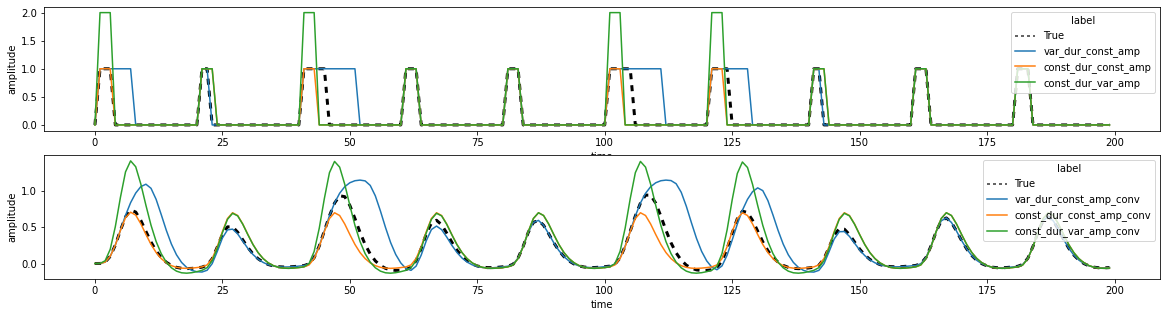

In [9]:
# Plot with nodes overlaid
nodes = pd.concat([node1, node2, node3], ignore_index=True)
nodes_conv = pd.concat([node1_conv, node2_conv, node3_conv], ignore_index=True)

plt.rcParams["figure.figsize"][0] = 20
plt.rcParams["figure.figsize"][1] = 5
fig, a = plt.subplots(2, 1)
sns.lineplot(data=stim, x="time", y="amplitude", style=True, dashes=[(2,2)], color="black", linewidth=3, ax=a[0])
sns.lineplot(data=nodes, x="time", y = "amplitude", hue = "label",  ax=a[0])

sns.lineplot(data=stim_conv, x="time", y="amplitude", style=True, dashes=[(2,2)], color="black", linewidth=3, ax=a[1])
sns.lineplot(data=nodes_conv, x="time", y = "amplitude", hue = "label",  ax=a[1])

A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.
A 'modulation' column was found in the given events data and is used.


<AxesSubplot:xlabel='time', ylabel='amplitude'>

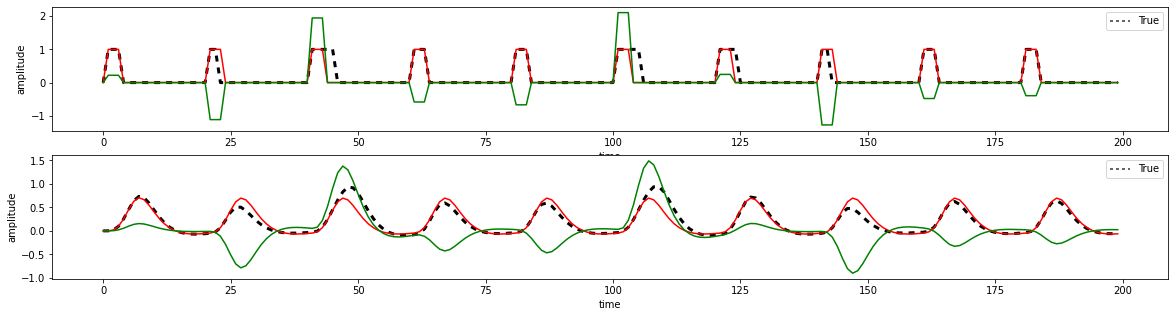

In [10]:
reg1_events = pd.DataFrame({'onset': onsets, 'duration': durations.mean(), 'trial_type': 'reg1', 'modulation': 1})
reg1 = events_to_timeseries(frame_times, reg1_events, label = 'reg1', hrf_model = None)
reg1_conv = events_to_timeseries(frame_times, reg1_events, label = 'reg1_conv', hrf_model = 'spm')

reg2_events = pd.DataFrame({'onset': onsets, 'duration': durations.mean(), 'trial_type': 'reg2', 'modulation': durations-durations.mean()})
reg2 = events_to_timeseries(frame_times, reg2_events, label = 'reg2', hrf_model = None)
reg2_conv = events_to_timeseries(frame_times, reg2_events, label = 'reg2_conv', hrf_model = 'spm')

# Plot with nodes overlaid

plt.rcParams["figure.figsize"][0] = 20
plt.rcParams["figure.figsize"][1] = 5
fig, a = plt.subplots(2, 1)
sns.lineplot(data=stim, x="time", y="amplitude", style=True, dashes=[(2,2)], color="black", linewidth=3, ax=a[0])
sns.lineplot(data=reg1, x="time", y = "amplitude", color = "red",  ax=a[0])
sns.lineplot(data=reg2, x="time", y = "amplitude", color = "green",  ax=a[0])
# sns.lineplot(data=nodes, x="time", y = "amplitude", hue = "label",  ax=a[0])

sns.lineplot(data=stim_conv, x="time", y="amplitude", style=True, dashes=[(2,2)], color="black", linewidth=3, ax=a[1])
sns.lineplot(data=reg1_conv, x="time", y = "amplitude", color = "red",  ax=a[1])
sns.lineplot(data=reg2_conv, x="time", y = "amplitude", color = "green",  ax=a[1])
# sns.lineplot(data=nodes_conv, x="time", y = "amplitude", hue = "label",  ax=a[1])

In [13]:
des_mat_events = pd.concat([reg1_events, reg2_events], ignore_index=True)
des_mat = make_first_level_design_matrix(frame_times, des_mat_events, drift_model=None, hrf_model = 'spm')
betas = np.vstack((get_b_est(node1_conv, des_mat), get_b_est(node2_conv, des_mat),get_b_est(node3_conv, des_mat)))
pd.DataFrame(betas,
    columns=['reg1 - event', 'reg2 - rt', 'intercept'],
    index=['node1 - var_dur_const_amp',
           'node2 - const_dur_const_amp',
          'node3 - const_dur_var_amp'])

A 'modulation' column was found in the given events data and is used.


,reg1 - event,reg2 - rt,intercept
node1 - var_dur_const_amp,0.842,0.298,0.128
node2 - const_dur_const_amp,1.000,0.000,-0.000
node3 - const_dur_var_amp,1.402,0.365,-0.001


In [14]:
des_mat = make_first_level_design_matrix(frame_times, stim_events, drift_model=None, hrf_model = 'spm')

betas = np.vstack((get_b_est(node1_conv, des_mat), get_b_est(node2_conv, des_mat), get_b_est(node3_conv, des_mat)))
pd.DataFrame(betas,
    columns=['stim', 'intercept'],
    index=['node1 - var_dur_const_amp',
           'node2 - const_dur_const_amp',
          'node3 - const_dur_var_amp'])

A 'modulation' column was found in the given events data and is used.


,stim,intercept
node1 - var_dur_const_amp,1.039,0.090
node2 - const_dur_const_amp,0.899,0.019
node3 - const_dur_var_amp,1.403,-0.002


What if we model Russ' simulated data with a single event regressor?

In [15]:
diff = 0.5  # difference in RT across conditions
ntrials = 32  

rtDf = pd.DataFrame({
    'condition': np.zeros(ntrials),
    'rt': np.zeros(ntrials)
})

rtDf.iloc[int(ntrials / 2):, 0] = 1

rtDf.loc[rtDf.condition == 0, 'rt'] = np.random.lognormal(0.0, 0.2, int(ntrials / 2))
rtDf.loc[rtDf.condition == 1, 'rt'] = np.random.lognormal(diff, 0.2, int(ntrials / 2))

# generate random onsets

trial_length = 16  # length of each trial, including ISI
total_length = trial_length * ntrials
randonsets = np.arange(0, total_length, trial_length)
np.random.shuffle(randonsets)
onsets = np.zeros(len(randonsets))
onsets[rtDf.condition == 0] = np.sort(randonsets[rtDf.condition == 0])
onsets[rtDf.condition == 1] = np.sort(randonsets[rtDf.condition == 1])

times = np.arange(0, total_length, 1 / 100.)
deslen = len(times)  # length of design in high-resolution (10 ms) space
sf_vd_ca = np.zeros(deslen)
sf_cd_ca = np.zeros(deslen)
sf_cd_va = np.zeros(deslen)
activation_effect = 1

for i in range(len(onsets)):
    start = int(onsets[i] * 100.)
    stop_var = int(onsets[i] * 100) + int(round(rtDf.rt[i] * 10))
    stop_const = int(onsets[i] * 100) + int(round(rtDf.rt.mean()))
    sf_vd_ca[start:stop_var] = 1
    sf_cd_ca[start:stop_const] = 1
    sf_cd_va[start:stop_const] = 1 + rtDf.condition[i] * activation_effect  # add activation effect

conv_sf_vd_ca = np.convolve(sf_vd_ca, spm_hrf(tr=0.01, oversampling=1.))[:len(sf_vd_ca)]
conv_sf_vd_ca = conv_sf_vd_ca[np.arange(0, len(conv_sf_vd_ca), 100)]

conv_sf_cd_ca = np.convolve(sf_cd_ca, spm_hrf(tr=0.01, oversampling=1.))[:len(sf_cd_ca)]
conv_sf_cd_ca = conv_sf_cd_ca[np.arange(0, len(conv_sf_cd_ca), 100)]

conv_sf_cd_va = np.convolve(sf_cd_va, spm_hrf(tr=0.01, oversampling=1.))[:len(sf_cd_va)]
conv_sf_cd_va = conv_sf_cd_va[np.arange(0, len(conv_sf_cd_va), 100)]


In [16]:
tmp = pd.DataFrame({"amplitude":np.hstack((conv_sf_vd_ca, conv_sf_cd_ca, conv_sf_cd_va)), 
                    "label":np.hstack((["conv_sf_vd_ca"]*len(conv_sf_vd_ca),["conv_sf_cd_ca"]*len(conv_sf_cd_ca),["conv_sf_cd_va"]*len(conv_sf_cd_va))),
                    "time": list(np.arange(0, len(conv_sf_vd_ca), 1))*3 })

<AxesSubplot:xlabel='time', ylabel='amplitude'>

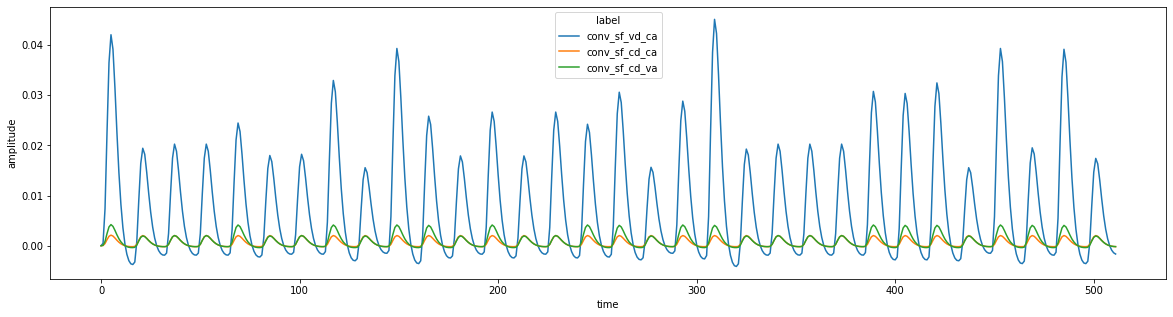

In [17]:
plt.rcParams["figure.figsize"][0] = 20
plt.rcParams["figure.figsize"][1] = 5
sns.lineplot(data=tmp, x="time", y="amplitude", hue="label")

In [18]:
reg1_events = pd.DataFrame({'onset': np.sort(randonsets), 'duration': rtDf['rt'].mean(), 'trial_type': 'reg1', 'modulation': 1})
reg2_events = pd.DataFrame({'onset': np.sort(randonsets), 'duration': rtDf['rt'].mean(), 'trial_type': 'reg2', 'modulation': rtDf['rt'] - rtDf['rt'].mean()})

frame_times = np.arange(len(conv_sf_vd_ca)) 
des_mat_events = pd.concat([reg1_events, reg2_events], ignore_index=True)
des_mat = make_first_level_design_matrix(frame_times, des_mat_events, drift_model=None, hrf_model = 'spm')

A 'modulation' column was found in the given events data and is used.


In [19]:
betas = np.vstack((get_b_est(conv_sf_vd_ca, des_mat), get_b_est(conv_sf_cd_ca, des_mat),get_b_est(conv_sf_cd_va, des_mat)))
pd.DataFrame(betas,
    columns=['reg1 - event', 'reg2 - rt', 'intercept'],
    index=['node1 - var_dur_const_amp',
           'node2 - const_dur_const_amp',
          'node3 - const_dur_var_amp'])

,reg1 - event,reg2 - rt,intercept
node1 - var_dur_const_amp,0.098,0.013,0.0
node2 - const_dur_const_amp,0.008,0.000,0.0
node3 - const_dur_var_amp,0.012,0.002,0.0
